In [1]:
library(anndata)
library(Signac)
library(Seurat)
library(ggplot2)
library(tidyverse)

Warning message:
“package ‘anndata’ was built under R version 4.3.2”
Attaching SeuratObject

‘SeuratObject’ was built with package ‘Matrix’ 1.6.1.1 but the current
version is 1.6.4; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ readr::read_csv() masks anndata::read_csv()
✖ purrr::reduce()   masks Signac::reduce()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
seurat <- readRDS("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/seurat_endocrine_annotated.rds")

In [3]:
endocrine_cell_types_red <- c(
    "Eps. progenitors",
    "Fev+ Delta,0",
    "Fev+ Delta,1",
    "Alpha",
    "Beta",
    "Delta",
    "Epsilon"
)

In [4]:
cols <- c( 'Prlf. Ductal'='#f7b6d2', 'Ductal'='#d62728', 'Imm. Acinar'='#ffeb3b', 'Mat. Acinar'='#98df8a',
    'Alpha'='#1f77b4', 'Beta'='#ff7f0e', 'Delta'='#279e68', 'Eps. progenitors'='#aa40fc', 'Epsilon'='#8c564b',
       'Fev+'='#e377c2', 'Fev+ Alpha'='#b5bd61', 'Fev+ Beta'='#aec7e8', 'Fev+ Delta'='#aec7e8', 'Fev+ Delta,0'='#ffbb78', 'Fev+ Delta,1'='#98df8a',
        'Fev+ Delta,2'='#17becf', 'Ngn3 high cycling'='#aec7e8',
        'Ngn3 high,0'='#ff9896', 'Ngn3 high'='#ff9896', 'Ngn3 high,1'='#f0b98d', 'Ngn3 low'='#c5b0d5')

In [5]:
seurat

An object of class Seurat 
312402 features across 11645 samples within 4 assays 
Active assay: atac (251676 features, 125868 variable features)
 3 other assays present: rna, scran, SCT
 2 dimensional reductions calculated: lsi, umap.atac

In [6]:
#new_annotations_endocrine <- read.csv("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/cell_type_annotation_endocrine.csv")

In [7]:
#seurat@meta.data <- cbind(seurat@meta.data, new_annotations_endocrine)

In [8]:
Idents(seurat) <- seurat@meta.data[["cell_type_refined"]]

In [9]:
Idents(seurat) <- factor(Idents(seurat), levels = endocrine_cell_types_red)

In [10]:
seurat <- subset(x=seurat, idents= endocrine_cell_types_red)

In [11]:
DefaultAssay(object=seurat) <- "atac"

In [12]:
LookupGeneCoords(seurat, "Sst")

GRanges object with 1 range and 0 metadata columns:
      seqnames            ranges strand
         <Rle>         <IRanges>  <Rle>
  [1]       16 23889573-23890958      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

In [13]:
LookupGeneCoords(seurat, "Gcg")

GRanges object with 1 range and 0 metadata columns:
      seqnames            ranges strand
         <Rle>         <IRanges>  <Rle>
  [1]        2 62474530-62483650      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

In [14]:
LookupGeneCoords(seurat, "Hhex")

GRanges object with 1 range and 0 metadata columns:
      seqnames            ranges strand
         <Rle>         <IRanges>  <Rle>
  [1]       19 37434810-37440731      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

In [15]:
LookupGeneCoords(seurat, "Ghrl") 

GRanges object with 1 range and 0 metadata columns:
      seqnames              ranges strand
         <Rle>           <IRanges>  <Rle>
  [1]        6 113716119-113719880      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

# Alpha

In [16]:
p <- CoveragePlot(
  object = seurat,
  region = "Gcg",
  annotation = TRUE,
  peaks = TRUE,
  extend.upstream = 300,
  extend.downstream = 300,
  wdith=5,
  height=1.5
)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


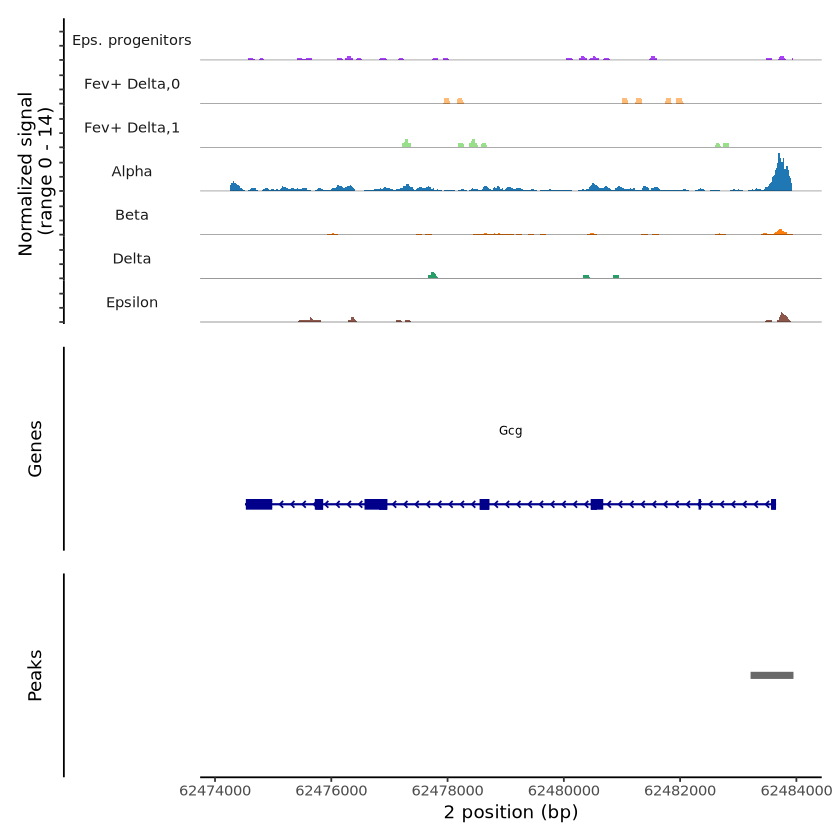

In [17]:
p & scale_fill_manual(values=cols)

# Delta

In [19]:
p <- CoveragePlot(
  object = seurat,
  region = "Sst",
  annotation = TRUE,
  peaks = TRUE,
  extend.upstream = 300,
  extend.downstream = 300,
  wdith=5,
  height=1.5
)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


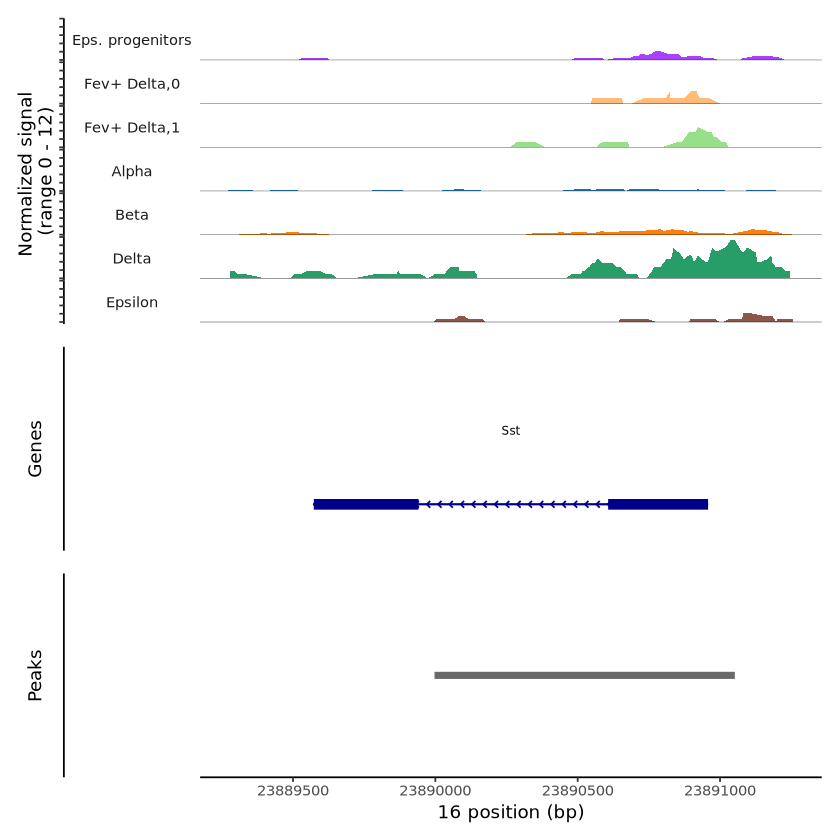

In [20]:
p & scale_fill_manual(values=cols)

In [21]:
p <- CoveragePlot(
  object = seurat,
  region = "Hhex",
  annotation = TRUE,
  peaks = TRUE,
  extend.upstream = 600,
  extend.downstream = 600,
  wdith=5,
  height=1.5
)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


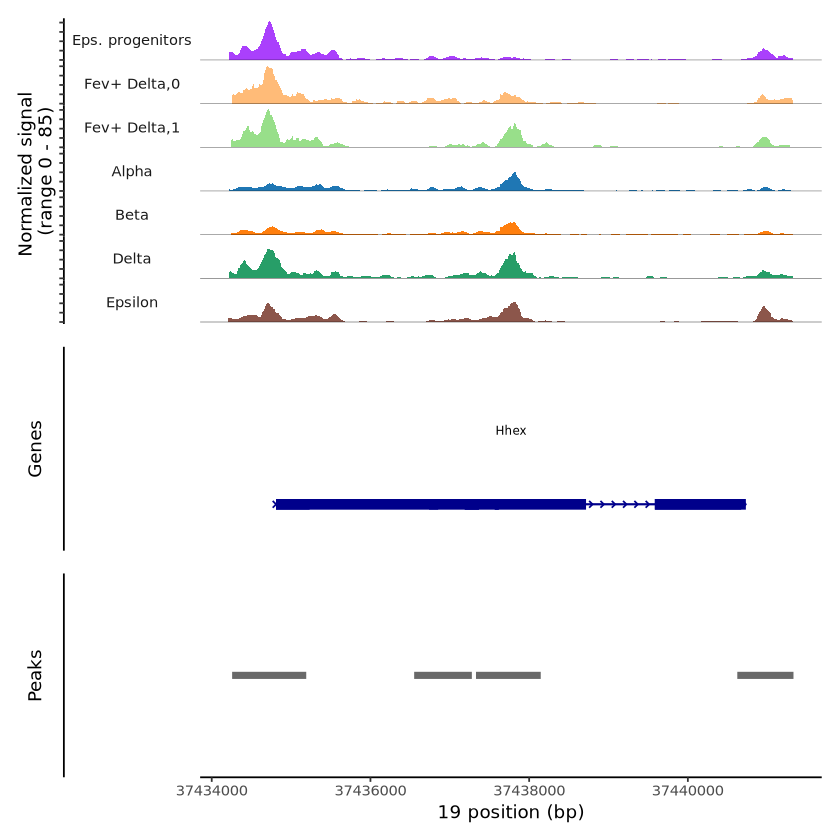

In [22]:
p & scale_fill_manual(values=cols)

# Beta

In [23]:
ins_2_range2 = "7-142678656-142679685"

In [24]:
p <- CoveragePlot(
  object = seurat,
  region = ins_2_range2,
  annotation = TRUE,
  peaks = TRUE,
  extend.upstream = 300,
  extend.downstream = 300,
  wdith=5,
  height=1.5
)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message:
“Removed 4 rows containing missing values (`geom_segment()`).”


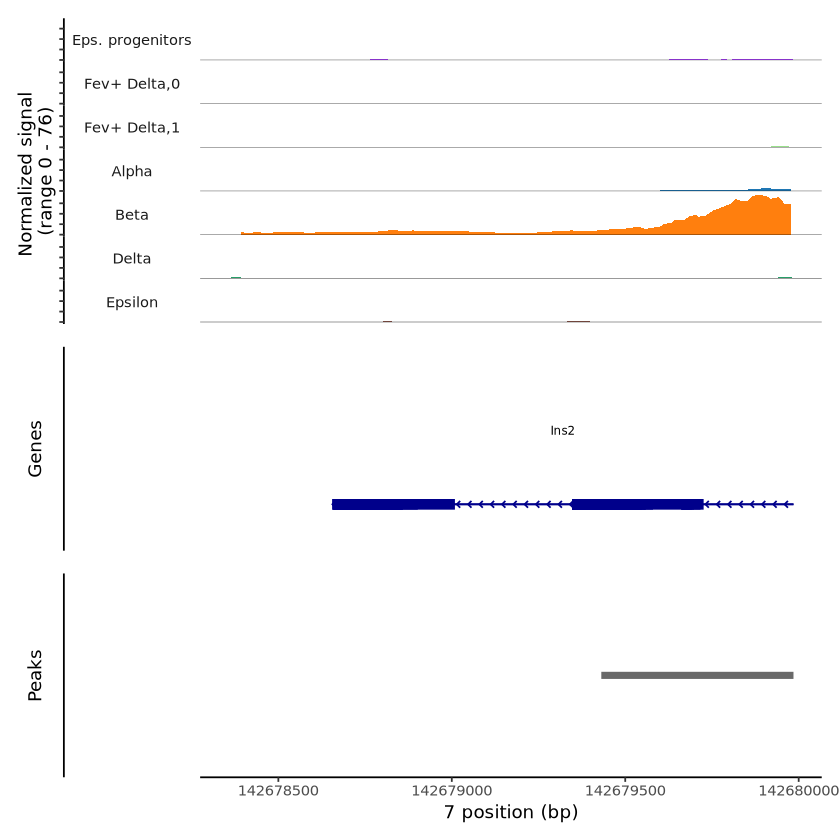

In [25]:
p & scale_fill_manual(values=cols)

In [26]:
p <- CoveragePlot(
  object = seurat,
  region = "7-142743000-142743381",
  annotation = TRUE,
  peaks = TRUE,
  extend.upstream = 300,
  extend.downstream = 300,
  wdith=5,
  height=1.5,
)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message:
“Removed 25 rows containing missing values (`geom_segment()`).”


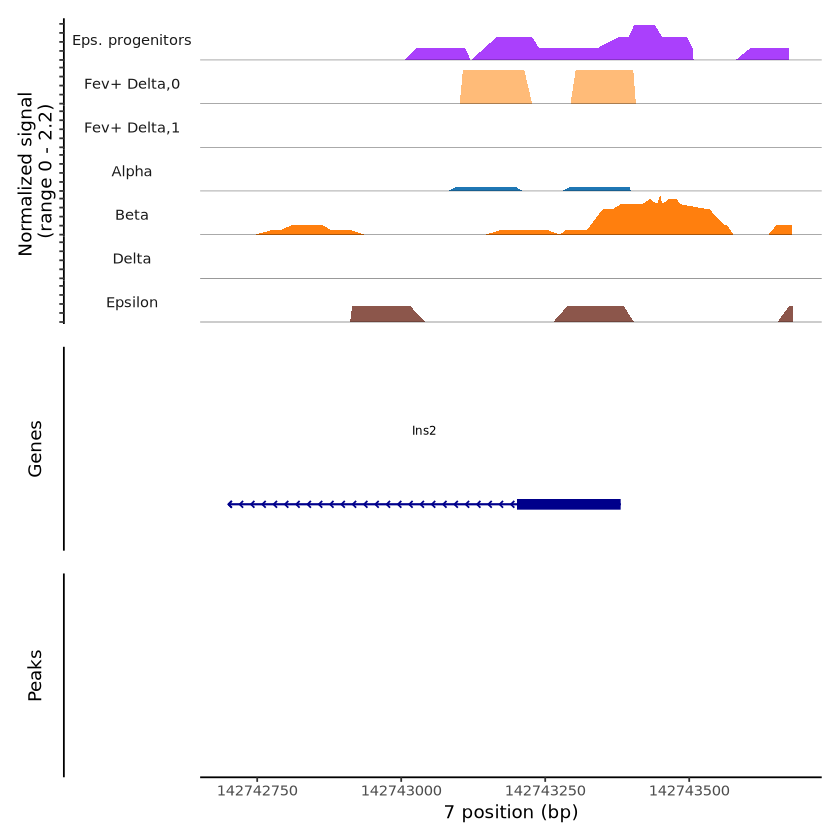

In [27]:
p & scale_fill_manual(values=cols)

# Epsilon 

In [28]:
p <- CoveragePlot(
  object = seurat,
  region ="Ghrl",
  annotation = TRUE,
  peaks = TRUE,
  extend.upstream = 400,
  extend.downstream = 400,
  wdith=5,
  height=1.5
    
)


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


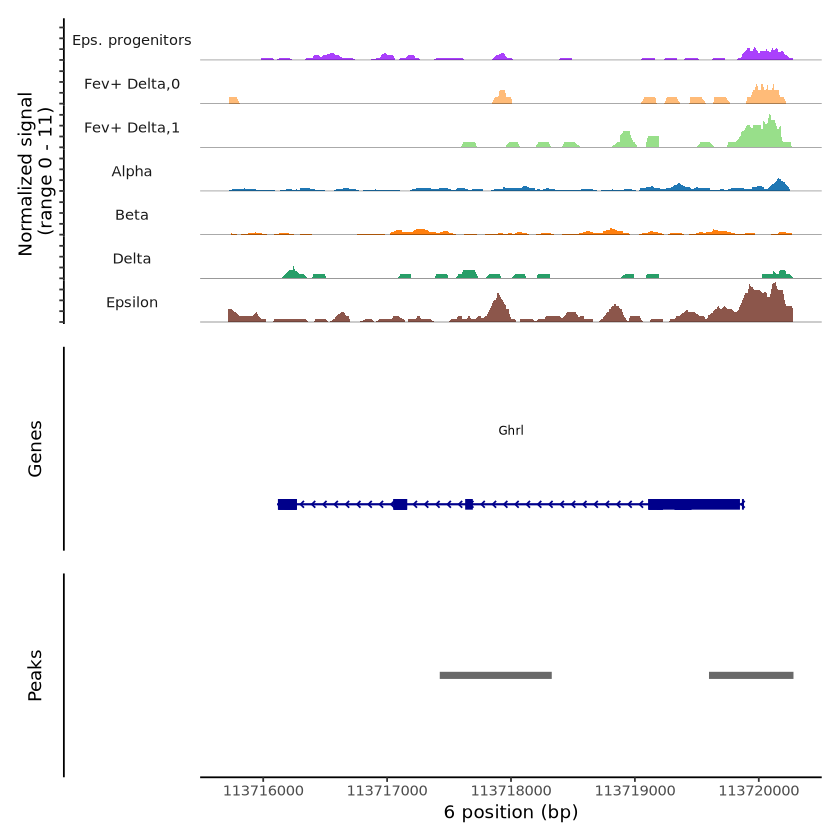

In [29]:
p & scale_fill_manual(values=cols)

In [ ]:
ggsave(file="ghrelin_atac.png", dpi=300)